In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
# IBMQ.load_account()
# provider = IBMQ.get_provider('ibm-q')
# name = 'ibmqx2'
# backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
import sys
sys.path.insert(1, '../Scripts')
from expfuncs import *
warnings.filterwarnings('ignore')

interested_qubits = [2,1]
itr = 16
QDT_correlated = True
noise_file_address = 'Noise/'
#ll_methods_data(interested_qubits,backend, itr, QDT_correlated, file_address = noise_file_address)

In [3]:
# Collect Grover Data
file_address = 'T5/'
# Groverexp(backend,file_address =file_address)

In [4]:
# Create Filters
our_filter, qiskit_filter, QDT_filter, SB_filter = create_filters(interested_qubits,QDT_correlated, from_file = True, file_address = noise_file_address)

Standard Bayesian filter
Our Filter
Qiskit filter
QDT filter


In [5]:
# Read Grover data
with open(file_address + 'Count_Grover.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    temp_counts = {}
    for row in reader:   
        temp_counts[row[0]] = int(row[1])
real_counts = {}
for key in temp_counts.keys():
    real_counts[key[0:2]] = temp_counts[key]

In [6]:
# Filtering
mean_counts = our_filter.filter_mean(real_counts)
mode_counts = our_filter.filter_mode(real_counts)
qis_counts = qiskit_filter.apply(real_counts)
QDT_counts = QDT_filter.filter(real_counts)
sbmean_counts = SB_filter.filter_mean(real_counts)
sbmode_counts = SB_filter.filter_mode(real_counts)

In [7]:
data_shots = 8192
print('Real Device',real_counts['11']/data_shots)
print('Qiskit Method',qis_counts['11']/data_shots)
print('QDT',QDT_counts['11']/data_shots)
print('SB Mean',sbmean_counts['11']/data_shots)
print('SB Mode',sbmode_counts['11']/data_shots)
print('Mean',mean_counts['11']/data_shots)
print('Mode',mode_counts['11']/data_shots)

Real Device 0.691650390625
Qiskit Method 0.732307532661351
QDT 0.73046875
SB Mean 0.928955078125
SB Mode 0.861572265625
Mean 0.931640625
Mode 0.912841796875


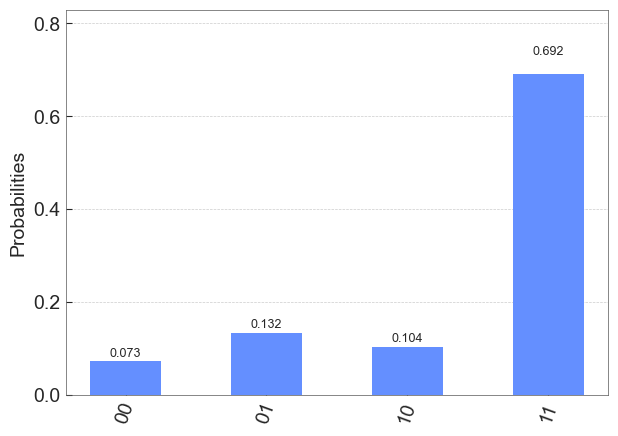

In [8]:
from qiskit.visualization import plot_histogram
plot_histogram(real_counts)

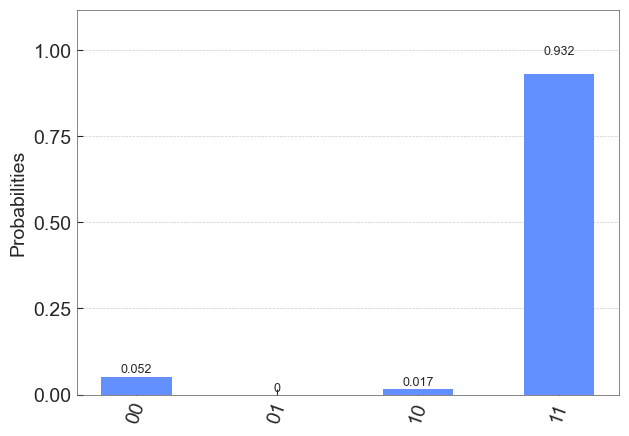

In [9]:
plot_histogram(mean_counts)

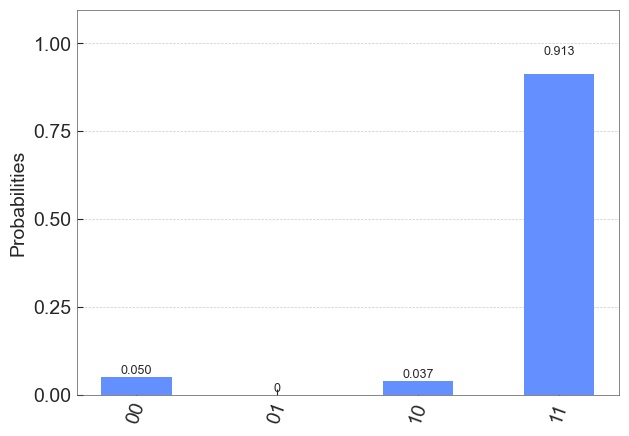

In [10]:
plot_histogram(mode_counts)